In [242]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster, cophenet

In [132]:
#import the dataset
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [133]:
#check shape of the data and related information about the columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We have 12330 records and 18 columns.

Out of the 18 columns, 8 features are categorical while the rest 10 are numerical

In [134]:
#We will drop the revenue column as this is the target variable

In [135]:
df_copy = df.drop('Revenue', axis=1)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [136]:
#We'll use the df_copy dataset from now on.

In [137]:
#calculate summary statiistics
df_copy.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN


In [138]:
#check for missing values
df_copy.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [139]:
#There are no missing values in the dataset.

**Exploratory Data Analysis**

Let us explore the data to find insights and relationships amongst the different variables

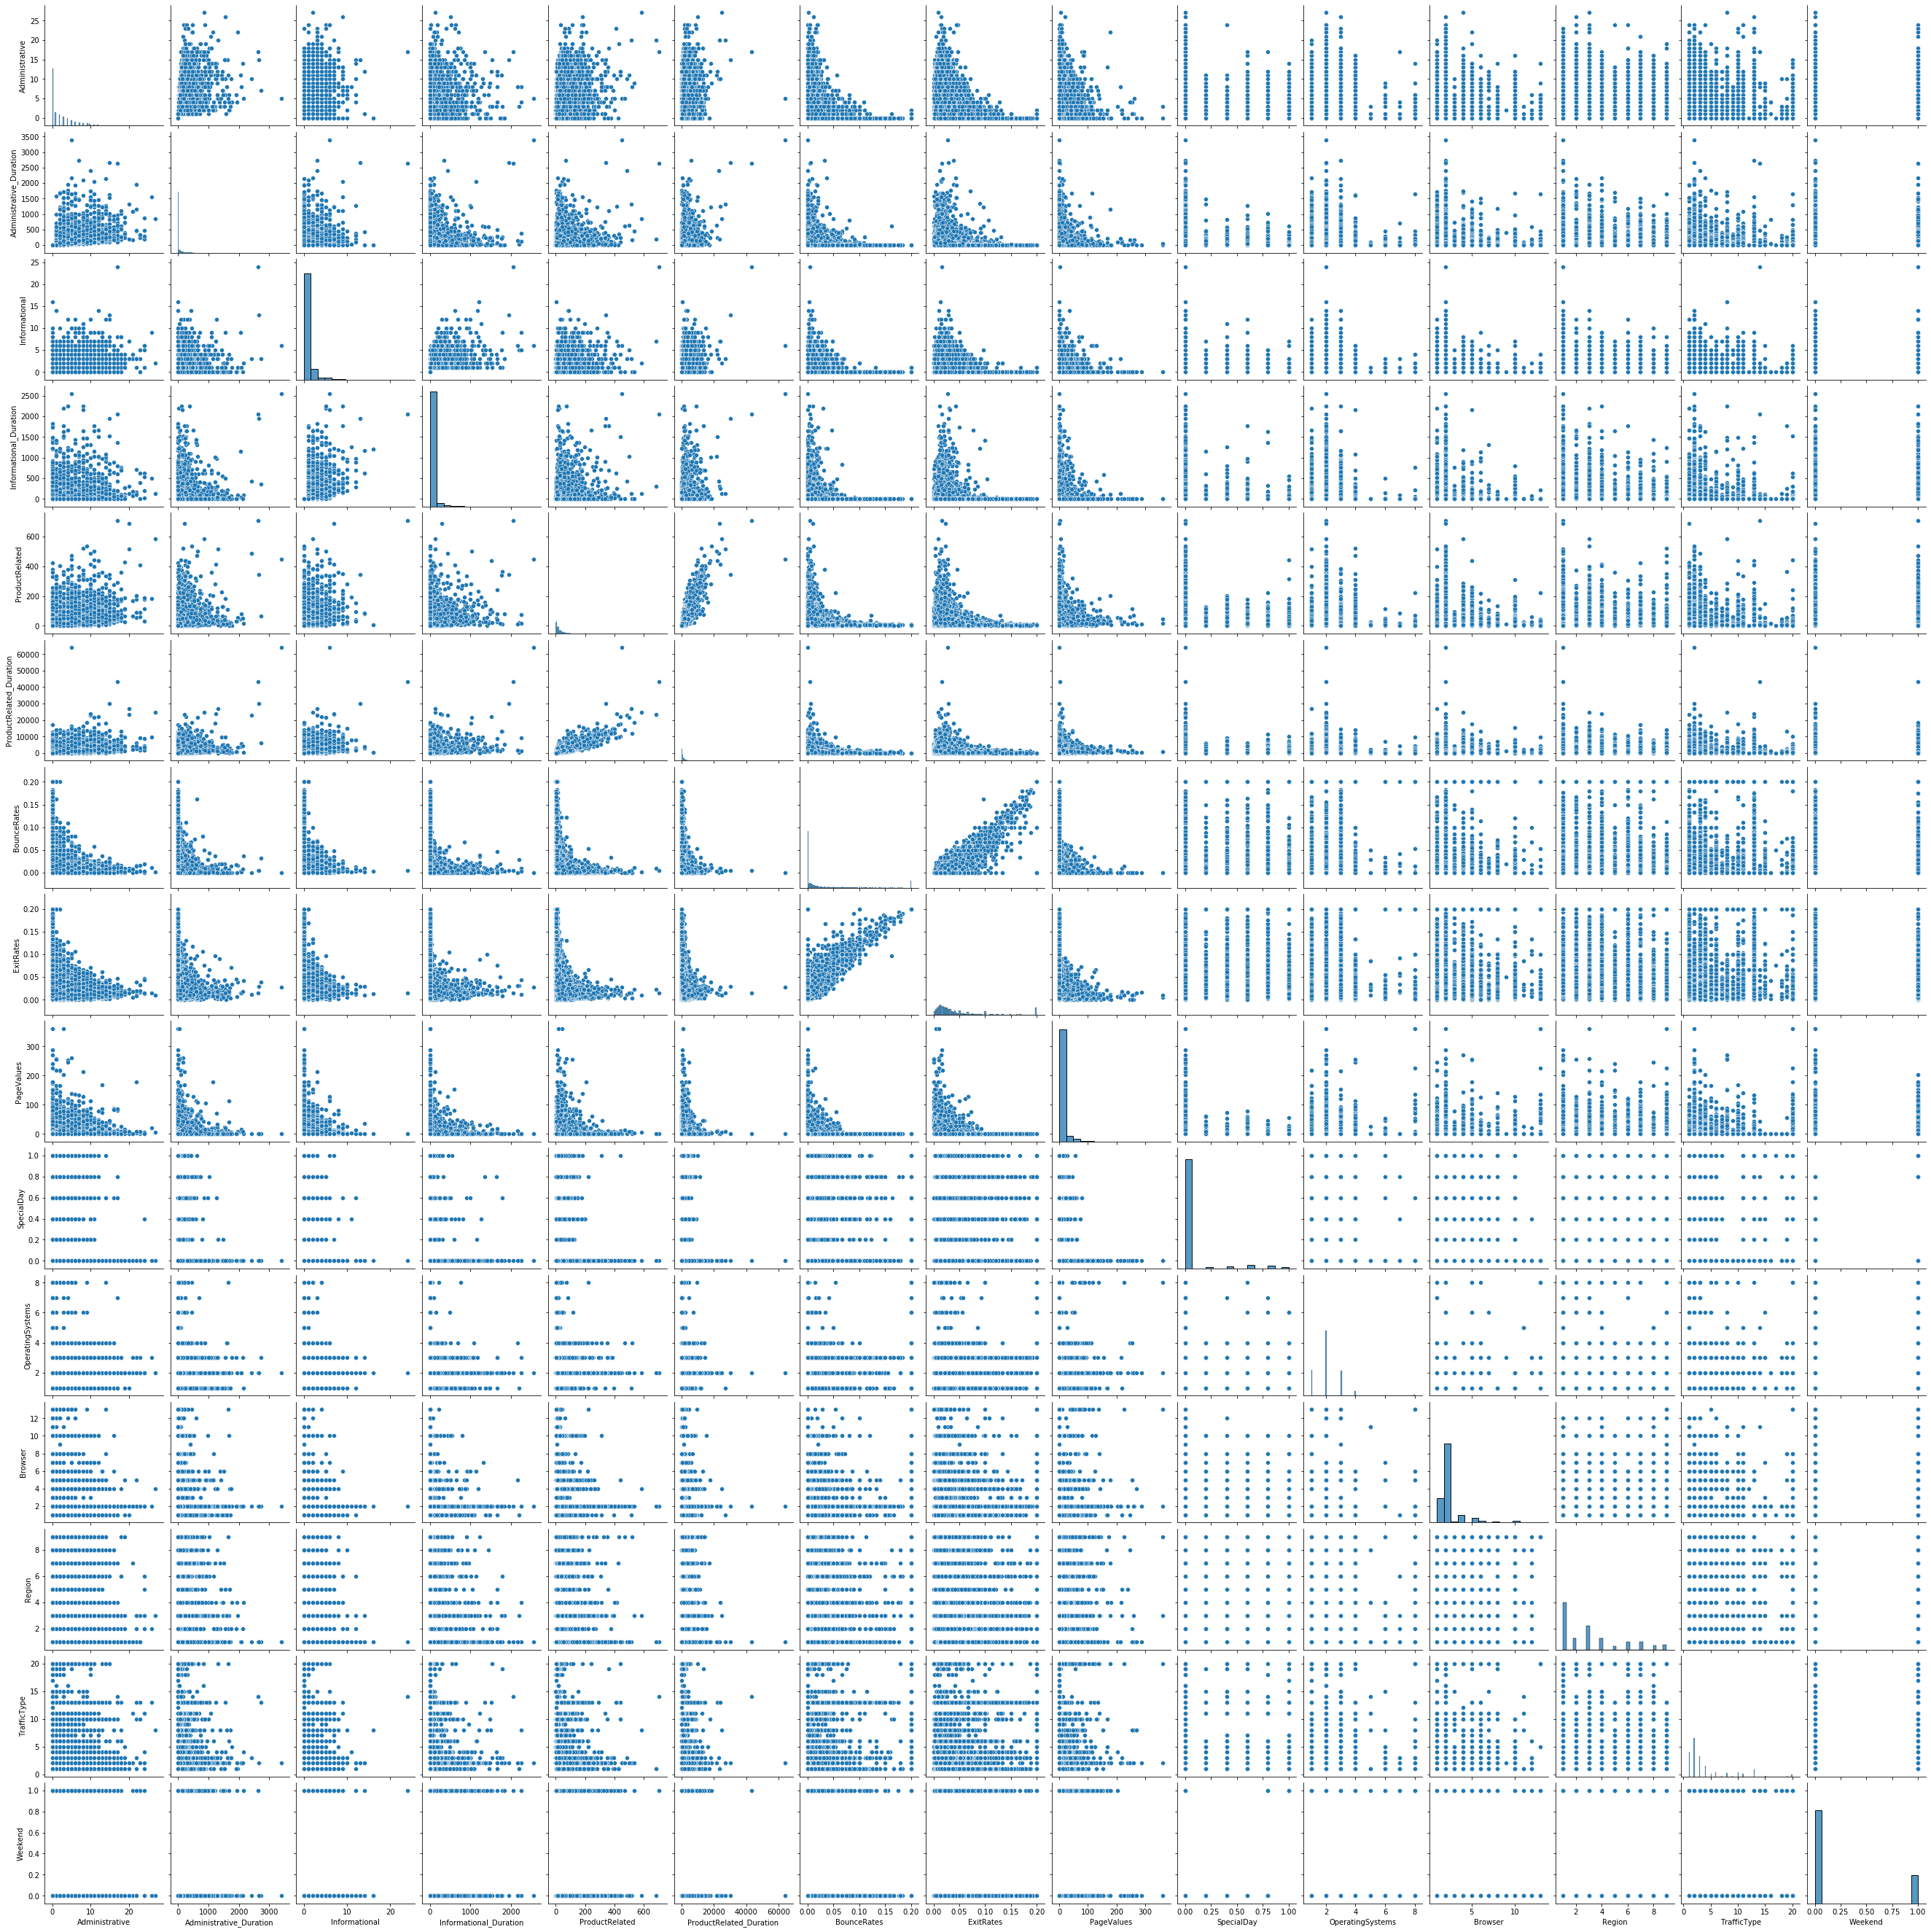

In [140]:
#pairplot
sns.pairplot(data=df_copy, diag_kind='hist', dropna=True, palette='viridis')
plt.show()

Looking at the pairplot, we can observe that there are linear relationships between some of the variables

Let us have a look at the correlation between different variables

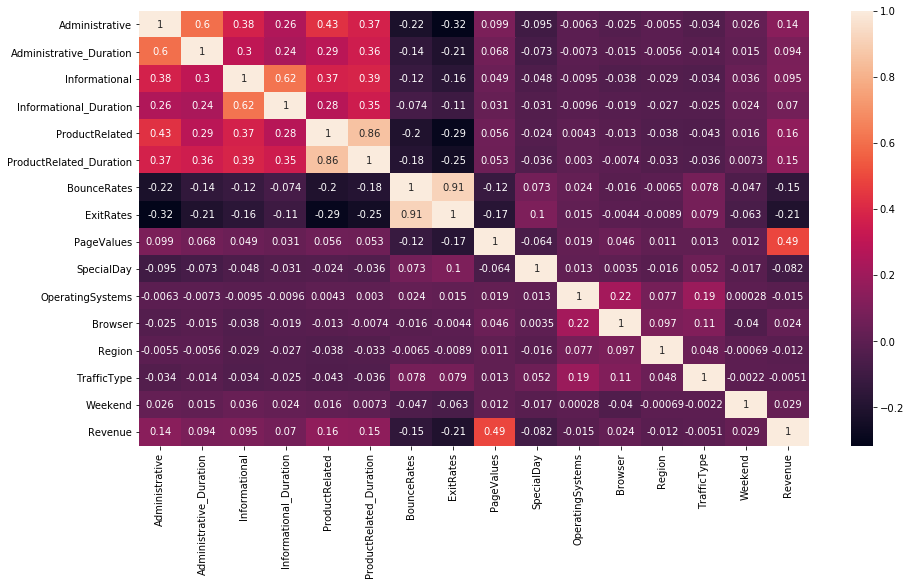

In [141]:
#Heatmap analysis
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

Looking at the above heatmap, we can infer:

1. **Product related** and **Product related duration** have a high correlation value of 0.86
2. **Bounce rates** and **Exit rates** have a high correlation value of 0.91

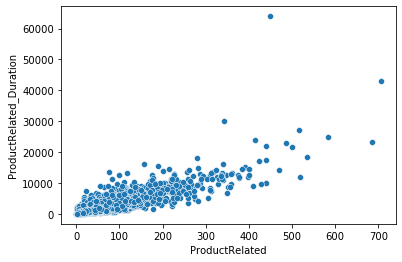

In [142]:
#scatter plot of product related vs product related duration
sns.scatterplot(x=df_copy['ProductRelated'], y=df['ProductRelated_Duration'])

We can see a linear relationship here.

This can be attributable to the fact that as the visitor browses more time on different products, he/she is likely to spend more time at looking at different features of the products.

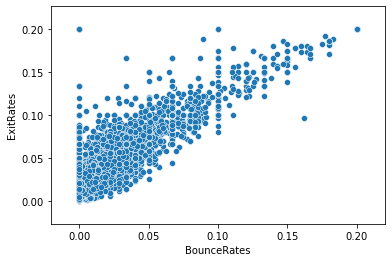

In [143]:
#scatter plot of Bounce rates vs Exit rates
sns.scatterplot(x=df_copy['BounceRates'], y=df['ExitRates'])

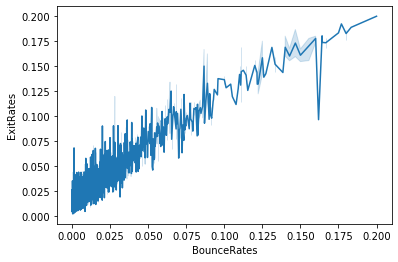

In [144]:
sns.lineplot(x=df_copy['BounceRates'], y=df['ExitRates'])

As the bounce rates increases, the exit rates are also increasing

Visitors who just enter different pages without intention of buying anything, are more likely to have higher exit rates.

In [145]:
df_copy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [146]:
df_copy.select_dtypes('object').columns

Index(['Month', 'VisitorType'], dtype='object')

In [147]:
df_copy.select_dtypes('bool').columns

Index(['Weekend'], dtype='object')

In [148]:
df_copy['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [149]:
df_copy['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [150]:
df_copy['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [151]:
df_copy['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Feature Engineering the Categorical variables

In [152]:
#we can use ordinal encoding for month and one hot encoding for visitor type and weekend

In [153]:
df_copy['Month'] = df_copy['Month'].replace({'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 
                                             'Nov':11, 'Dec':12})

In [154]:
df_copy['Weekend'] = df_copy['Weekend'].astype('object')

In [164]:
df_encoded = pd.get_dummies(df_copy, drop_first=True)
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,1


In [166]:
#df_encoded['PageValues'].value_counts()

#### Feature Scaling

In [197]:
#perform scaling using MinMax scaler
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(data=scaler.fit_transform(df_encoded), columns=df_encoded.columns)
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.0,0.285714,0.166667,0.000,0.157895,0.0,1.0,1.0


### **Building the cluster models**

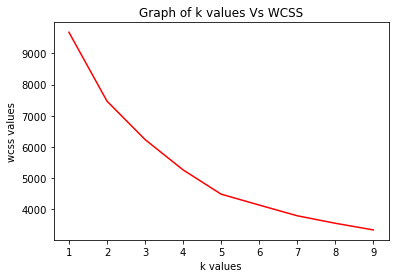

In [201]:
#finding the optimal K value by the elbow method
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_scaled)
    """Inertia returns the sum of squared distances of samples to their closest cluster center"""
    wcss.append(kmeans.inertia_) 
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values Vs WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We can observe from the above graph that the optimal number of clusters is 5 but the revenue column contains only 2 labels.
Let's valiadate the clusters using silhouette method

In [203]:
#fit the model with 5 clusters
model = KMeans(n_clusters=5, random_state=10)
model.fit(df_scaled)

#predict the output
new_clusters = model.predict(df_scaled)

In [213]:
df_encoded['Labels'] = model.labels_
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Labels
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,1,0,4
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,1,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,1,0,4
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,1,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,1,3


In [229]:
#check the cluster centers and interpret the results
df_encoded.iloc[:,:].groupby('Labels').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
Labels,,,,,,,,,,,,,,,,,,
0,2.563689,92.810889,0.334294,19.355357,18.212680,649.299571,0.001953,0.018223,11.408870,0.019366,8.538329,2.183862,2.585591,3.434006,4.280115,0.039769,0.00000,0.276081
1,2.933575,101.877334,0.663969,47.166472,45.547307,1752.339148,0.010385,0.031711,6.521144,0.000000,10.806866,2.092102,2.307284,3.073960,3.967067,0.000000,1.00000,0.000000
2,1.983020,69.160515,0.444302,29.691610,27.939028,1055.088654,0.012223,0.037779,4.078636,0.129354,4.492153,2.109339,2.375611,3.117057,3.892977,0.000000,1.00000,0.000000
3,2.593446,88.967581,0.671391,47.411144,38.047830,1415.053968,0.011060,0.032461,6.023580,0.063419,7.712578,2.132418,2.238264,3.105403,4.050044,0.000000,1.00000,1.000000
4,0.026528,0.835486,0.008074,0.000000,2.241061,34.294710,0.185166,0.191123,0.000000,0.089735,6.848904,2.179931,2.332180,3.122261,4.914648,0.018454,0.94925,0.151096


In [ ]:
#There is a significant difference in the cluster centroids among the different cluster groups

In [215]:
#check the size for the clusters
df_encoded['Labels'].value_counts()

2    3887
1    3583
3    2258
0    1735
4     867
Name: Labels, dtype: int64

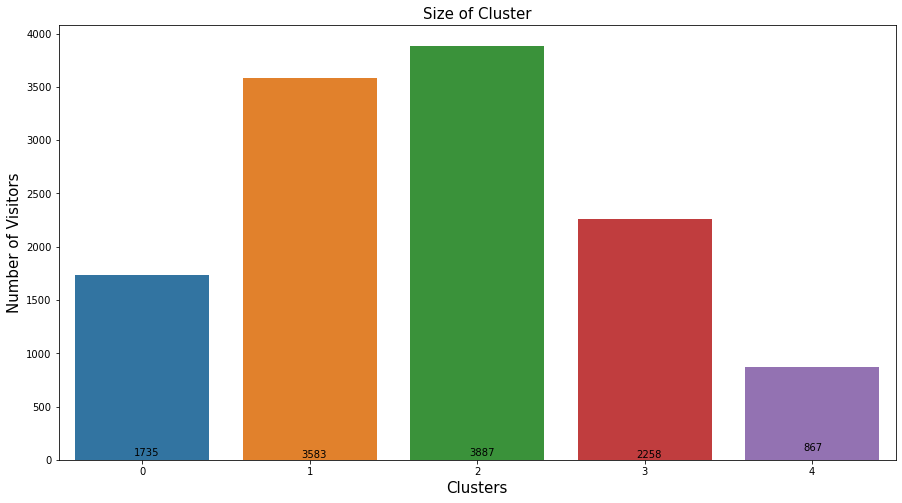

In [207]:
#visualize the clusters using bar plot
plt.figure(figsize=(15,8))
sns.countplot(data=df_copy, x='Labels')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Visitors', fontsize = 15)

plt.text(x = -0.05, y =39, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(model.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(model.labels_, return_counts=True)[1][4])

plt.show()

The 3rd cluster is the largest cluster with 3887 visitors.

In [208]:
#compare the cluster group with the revenue
pd.crosstab(df_copy['Labels'],df['Revenue'])

Revenue,False,True
Labels,,
0,1297,438
1,2874,709
2,3522,365
3,1865,393
4,864,3


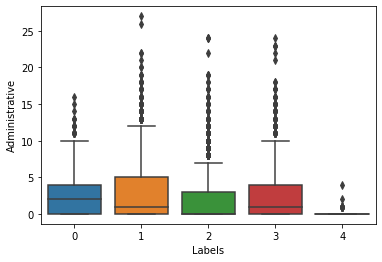

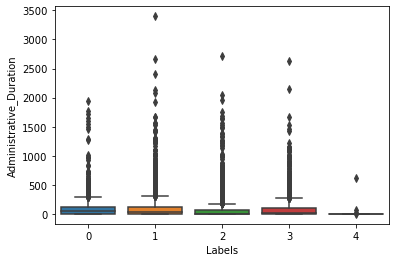

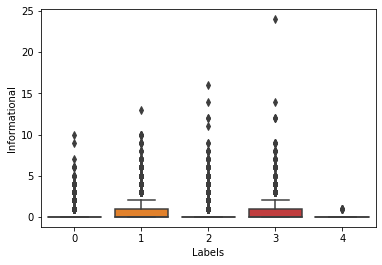

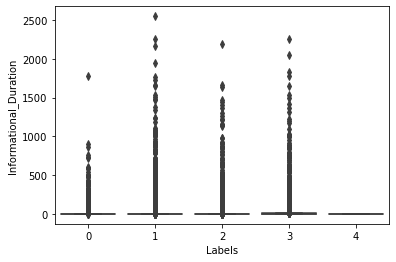

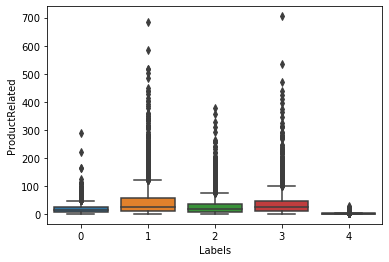

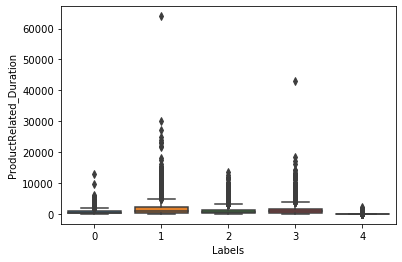

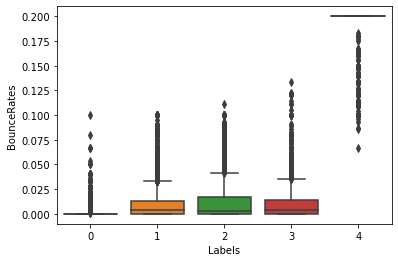

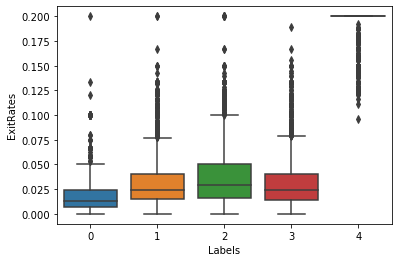

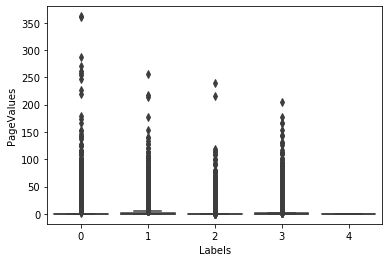

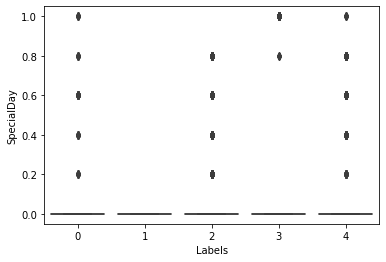

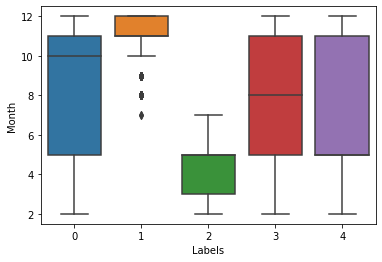

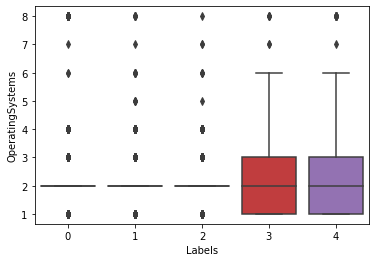

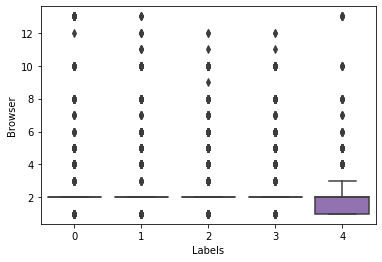

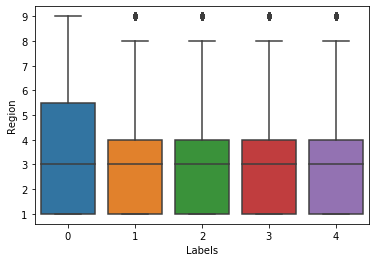

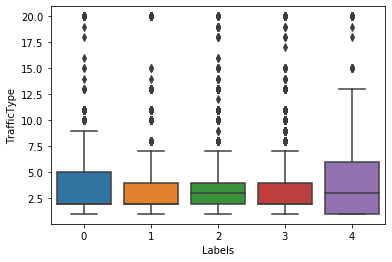

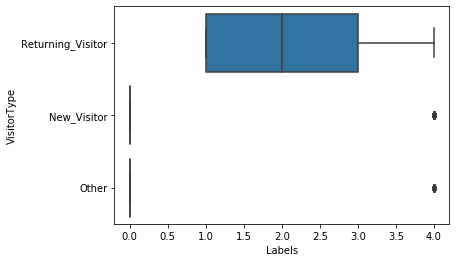

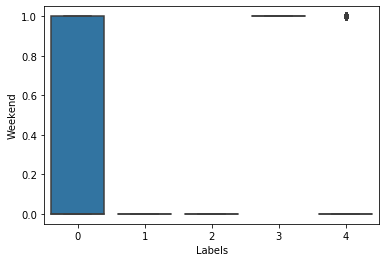

In [211]:
#analyze the clusters w.r.t other features
for i in df_copy.columns[:-1]:
    sns.boxplot(df_copy['Labels'], df_copy[i])
    plt.show()

In [230]:
#The same above cluster formations can also be done with k=2, as only two levels exist in 'Revenue' column

In [ ]:
#validating the clusters using Silhouette score method

In [237]:
n_clusters= [2,3,4,5,6,7,8,9,10]

for K in n_clusters:
    cm = KMeans(n_clusters=K, random_state=10)
    cm.fit(df_scaled)
    score = silhouette_score(df_scaled, cm.labels_, random_state= 10)
    print ("For {} clusters the silhouette score is {}".format(K, score))

For 2 clusters the silhouette score is 0.30457920585131293
For 3 clusters the silhouette score is 0.32934485902467736
For 4 clusters the silhouette score is 0.349328901608359
For 5 clusters the silhouette score is 0.2764905546413097
For 6 clusters the silhouette score is 0.2990473812375451
For 7 clusters the silhouette score is 0.2939745842464522
For 8 clusters the silhouette score is 0.286743184746864
For 9 clusters the silhouette score is 0.2915626662540374
For 10 clusters the silhouette score is 0.28765720234353187


In [ ]:
#Here the highest silhouette score is for k = 4.

**Analyze the clusters**

In [ ]:
#Cluster 1

In [95]:
len(df_copy[df_copy['Cluster'] == 0])

2998

In [96]:
df_copy[df_copy['Cluster'] == 0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster
count,2998.000000,2998.000000,2998.0,2998.0,2998.000000,2998.000000,2998.000000,2998.000000,2998.0,2998.0,...,2998.0,2998.0,2998.0,2998.0,2998.0,2998.0,2998.0,2998.000000,2998.000000,2998.0
mean,2.166778,46.396952,0.0,0.0,27.428286,1037.037769,0.007498,0.028793,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.007338,0.852902,0.0
std,2.676447,58.953201,0.0,0.0,20.325382,834.482075,0.009099,0.020527,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085363,0.354263,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.0,10.000000,278.750000,0.000000,0.014197,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0
50%,1.000000,13.000000,0.0,0.0,25.000000,926.449405,0.003922,0.023242,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0
75%,4.000000,93.256250,0.0,0.0,38.000000,1464.157213,0.013976,0.040000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0
max,10.000000,232.353571,0.0,0.0,84.000000,3374.016667,0.041667,0.101449,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.0


In [ ]:
#Cluster 2

In [97]:
len(df_copy[df_copy['Cluster'] == 1])

1907

In [98]:
df_copy[df_copy['Cluster'] == 1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster
count,1907.000000,1907.000000,1907.0,1907.0,1907.000000,1907.000000,1907.000000,1907.000000,1907.0,1907.0,...,1907.0,1907.0,1907.0,1907.0,1907.0,1907.0,1907.0,1907.0,1907.000000,1907.0
mean,1.706869,38.794791,0.0,0.0,18.271106,696.419051,0.006329,0.031715,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.878343,1.0
std,2.333112,56.468692,0.0,0.0,16.902362,727.014919,0.009325,0.023933,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326975,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000176,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
25%,0.000000,0.000000,0.0,0.0,6.000000,132.983333,0.000000,0.012850,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
50%,0.000000,0.000000,0.0,0.0,13.000000,438.433333,0.000000,0.025000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
75%,3.000000,74.000000,0.0,0.0,27.000000,1090.120238,0.013333,0.050000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
max,10.000000,233.083333,0.0,0.0,84.000000,3380.691558,0.041667,0.102564,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


In [105]:
#Cluster 3
len(df_copy[df_copy['Cluster'] == 2])

1727

In [106]:
df_copy[df_copy['Cluster'] == 2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster
count,1727.000000,1727.000000,1727.0,1727.0,1727.000000,1727.000000,1727.000000,1727.000000,1727.0,1727.0,...,1727.0,1727.0,1727.0,1727.0,1727.0,1727.0,1727.0,1727.000000,1727.000000,1727.0
mean,1.927620,43.841500,0.0,0.0,21.941517,825.430022,0.007033,0.031074,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035900,0.770122,2.0
std,2.565701,58.083614,0.0,0.0,18.231184,766.680156,0.009539,0.022157,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186096,0.420876,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000505,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.0,0.0,7.000000,183.166667,0.000000,0.014675,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2.0
50%,1.000000,3.000000,0.0,0.0,17.000000,611.083333,0.001449,0.025000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2.0
75%,3.000000,93.256250,0.0,0.0,35.000000,1361.707686,0.014039,0.044623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2.0
max,10.000000,231.750000,0.0,0.0,83.000000,3376.027564,0.041667,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.0


In [ ]:
#Cluster 4

In [107]:
len(df_copy[df_copy['Cluster'] == 3])

3364

In [108]:
df_copy[df_copy['Cluster'] == 3].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster
count,3364.000000,3364.000000,3364.0,3364.0,3364.000000,3364.000000,3364.000000,3364.000000,3364.0,3364.000000,...,3364.0,3364.0,3364.0,3364.0,3364.0,3364.0,3364.0,3364.0,3364.000000,3364.0
mean,1.770809,37.842619,0.0,0.0,21.936683,787.135770,0.008906,0.034810,0.0,0.212366,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.905172,3.0
std,2.521410,54.511278,0.0,0.0,18.436166,771.026034,0.010177,0.023871,0.0,0.324757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293020,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000263,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3.0
25%,0.000000,0.000000,0.0,0.0,7.000000,162.500000,0.000000,0.015425,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,3.0
50%,0.000000,0.000000,0.0,0.0,17.000000,535.733333,0.005128,0.029595,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,3.0
75%,3.000000,76.166667,0.0,0.0,34.000000,1261.583333,0.016813,0.050000,0.0,0.400000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,3.0
max,10.000000,233.000000,0.0,0.0,84.000000,3382.287999,0.041844,0.102717,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,3.0


In [109]:
#Cluster 5

In [110]:
len(df_copy[df_copy['Cluster'] == 4])

2334

In [111]:
df_copy[df_copy['Cluster'] == 4].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster
count,2334.000000,2334.000000,2334.0,2334.0,2334.000000,2334.000000,2334.000000,2334.000000,2334.0,2334.000000,...,2334.000000,2334.000000,2334.0,2334.0,2334.0,2334.000000,2334.000000,2334.000000,2334.000000,2334.0
mean,2.420737,52.456414,0.0,0.0,23.353899,791.428652,0.008133,0.031279,0.0,0.018423,...,0.185090,0.123393,0.0,0.0,0.0,0.235219,0.191945,0.000428,0.832905,4.0
std,2.640873,57.645204,0.0,0.0,19.117541,749.410406,0.009892,0.023345,0.0,0.107912,...,0.388454,0.328959,0.0,0.0,0.0,0.424226,0.393915,0.020699,0.373141,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,0.0,0.0,8.000000,186.225000,0.000000,0.012859,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,4.0
50%,2.000000,34.421212,0.0,0.0,18.000000,539.667857,0.003493,0.025567,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,4.0
75%,4.000000,93.256250,0.0,0.0,38.000000,1324.807500,0.016813,0.050000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,4.0
max,10.000000,232.340476,0.0,0.0,84.000000,3371.050000,0.041945,0.103333,0.0,1.000000,...,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,4.0


## Hierarchical Clustering

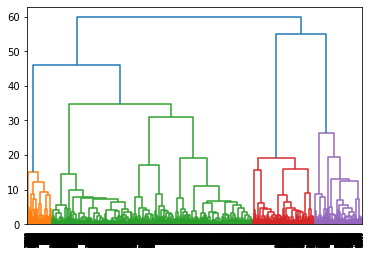

In [239]:

mergings = linkage(df_scaled, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [240]:
#From the above dendrogram, we can observe that the optimal number of clusters is 2

## Applying PCA

In [263]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.90:
        break
    itr=itr+1

print('The number of principle components capturing 90 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 90 percent varaition is data is :  7  Varaince explained is  0.90439771920694


Text(0, 0.5, 'Variance Ratio')

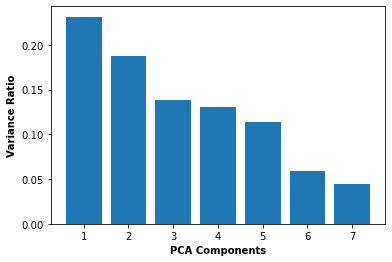

In [264]:
# Variance Ratio bar plot for each PCA components.
pc=exp_var_ratio[:itr]
ax = plt.bar(range(1,len(pc)+1), pc)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [265]:
#Select only 7 PCs
pcadata=pca_data[:,:itr]
pcadata.shape

(12330, 7)

Text(0, 0.5, 'Cumulative Explained Variance')

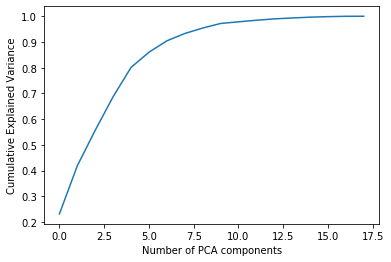

In [283]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [285]:
pd.DataFrame(pcadata).corr().round()

,0,1,2,3,4,5,6
0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
1,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0
2,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
3,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0
4,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0
5,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0
6,0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0


In [286]:
# Checking which attributes are well explained by the pca components
attributes_pca=pd.DataFrame()
for i in range(4):
    attributes_pca['PC'+str(i+1)]=pca.components_[i]
attributes_pca['Attribute']=df_scaled.columns
attributes_pca

,PC1,PC2,PC3,PC4,Attribute
0,0.025549,-0.061084,-0.006518,-0.101741,Administrative
1,0.006905,-0.017371,-0.002739,-0.027401,Administrative_Duration
2,0.007131,-0.007259,0.005472,-0.031674,Informational
3,0.004838,-0.004325,0.004889,-0.023191,Informational_Duration
4,0.007727,-0.016828,0.019555,-0.066719,ProductRelated
5,0.002716,-0.006964,0.008578,-0.028390,ProductRelated_Duration
6,-0.122371,0.317737,0.252191,0.537687,BounceRates
7,-0.137823,0.343011,0.244492,0.523224,ExitRates
8,0.007235,-0.022556,-0.006035,-0.008165,PageValues
9,-0.039654,0.141167,-0.143268,0.034240,SpecialDay


In [287]:
col=list(np.arange(1,pcadata.shape[1]+1))
col

[1, 2, 3, 4, 5, 6, 7]

In [288]:
# Creating new dataframe with Principal components

df_pca_final = pd.DataFrame(pcadata, columns=col)
#df_pca_final = pd.concat([data['country'], df_pca], axis=1)
df_pca_final.head()

,1,2,3,4,5,6,7
0,-0.532830,0.889934,-0.012108,0.737963,-0.417431,-0.320951,-0.165089
1,-0.342230,0.395291,-0.381188,-0.046584,-0.226758,-0.105157,-0.153496
2,-0.517989,0.784976,0.001483,1.027975,0.556373,-0.233891,-0.186090
3,-0.398702,0.527986,-0.260042,0.243012,-0.151212,-0.031200,-0.191595
4,0.636425,0.617982,-0.367569,-0.061864,-0.192041,0.042783,-0.188762


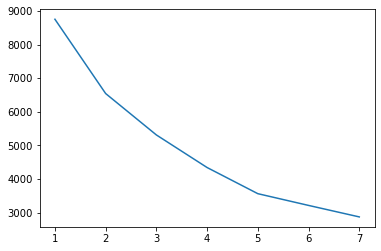

In [292]:
# K-means Clustering

wcss=[]

cl=[1,2,3,4,5,6,7]

for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    wcss.append(mod.inertia_)
    
plt.plot(cl,wcss)
plt.show()

In [ ]:
#using PCA we are getting the clusters=5 but this time with only 7 principal components.